<div style="line-height:0.5">
<h1 style="color:lightcoral"> Pandas basics 5 </h1>
</div>
<div style="line-height:1.5">
<div style="margin-top: -8px;">
<span style="display: inline-block;">
    <h3 style="color: lightblue; display: inline;">Keywords:</h3> resampling + rescaling + outliers + PolynomialFeatures + np.digitize()
</span>
</div>
<div style="margin-top: 4px;">
<div style="line-height:1">
<span style="display: inline-block;">
    <h3 style="color: red; display: inline;">Notes:</h3> 
    The "df_trends" dataset was not uploaded due to its size, greater than 75 MB.
</span>
</div>
</div>

In [2]:
import numpy as np
import scipy as sc
import pandas as pd
import copy as copy
from tabulate import tabulate
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.datasets import make_blobs 
from sklearn.covariance import EllipticEnvelope 

In [7]:
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv'
df_titanic = pd.read_csv(url)
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<h2 style="color:lightcoral"> Create a new Data Frame from scratch </h2>

In [23]:
dataframe = pd.DataFrame()
dataframe['Name'] = ['Jacky Jackson', 'Steven Stevenson'] 
dataframe['Age'] = [38, 25]
dataframe['Driver'] = [True, False]

dataframe

,Name,Age,Driver
0,Jacky Jackson,38,True
1,Steven Stevenson,25,False


In [25]:
""" Append row
N.B. append => deprecated !
dataframe.append(new_person, ignore_index=True)
"""


new_person = pd.Series(['Molly Mooney', 40, True], index=['Name','Age','Driver']) 
new_person1 = pd.Series(['Ciao Pep', 35, True], index=['Name','Age','Driver']) 
# Concatenate the new row to the DataFrame
dataframe = pd.concat([dataframe, new_person1.to_frame().T], ignore_index=True)
# Print the updated DataFrame
print(dataframe)


               Name Age Driver
0     Jacky Jackson  38   True
1  Steven Stevenson  25  False
2          Ciao Pep  35   True
3          Ciao Pep  35   True


In [26]:
dataframe.describe

<bound method NDFrame.describe of                Name Age Driver
0     Jacky Jackson  38   True
1  Steven Stevenson  25  False
2          Ciao Pep  35   True
3          Ciao Pep  35   True>

In [27]:
print(dataframe.head(5))
##dataframe = dataframe.set_index(dataframe['Name'], drop=True) #drop = True useless here! We have still two columns
dataframe = dataframe.set_index('Name', drop=True)
print(dataframe.head(5))

               Name Age Driver
0     Jacky Jackson  38   True
1  Steven Stevenson  25  False
2          Ciao Pep  35   True
3          Ciao Pep  35   True
                 Age Driver
Name                       
Jacky Jackson     38   True
Steven Stevenson  25  False
Ciao Pep          35   True
Ciao Pep          35   True


In [30]:
# Show top two rows where column 'sex' is 'female' 
df_titanic[df_titanic['sex'] == 'female'].head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [31]:
# Filter rows 
age_filter = df_titanic['age'] > 65
age_filter = age_filter.reindex(df_titanic.index)

filtered_dataframe = df_titanic[age_filter]

# Print the filtered DataFrame
print(filtered_dataframe)

     survived  pclass   sex   age  sibsp  parch     fare embarked   class  \
33          0       2  male  66.0      0      0  10.5000        S  Second   
96          0       1  male  71.0      0      0  34.6542        C   First   
116         0       3  male  70.5      0      0   7.7500        Q   Third   
493         0       1  male  71.0      0      0  49.5042        C   First   
630         1       1  male  80.0      0      0  30.0000        S   First   
672         0       2  male  70.0      0      0  10.5000        S  Second   
745         0       1  male  70.0      1      1  71.0000        S   First   
851         0       3  male  74.0      0      0   7.7750        S   Third   

     who  adult_male deck  embark_town alive  alone  
33   man        True  NaN  Southampton    no   True  
96   man        True    A    Cherbourg    no   True  
116  man        True  NaN   Queenstown    no   True  
493  man        True  NaN    Cherbourg    no   True  
630  man        True    A  Southampt

In [32]:
# Replace "female" and "male with "Woman" and "Man" 
df_titanic['sex'].replace(["female", "male"], ["Woman", "Man"]).head(5)

0      Man
1    Woman
2    Woman
3    Woman
4      Man
Name: sex, dtype: object

In [33]:
# find and replace across the entire DataFrame object by specifying the whole data frame instead of a single column: 
# Replace values, show two rows 
df_titanic.replace(1, "One").head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,One,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,One,One,female,38.0,One,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [34]:
# Rename column, show two rows 
a = df_titanic.rename(columns={'Name': 'Full_name Class'}).head(2)
b = a.rename(columns={'PClass': 'Passenger Class', 'sex': 'Gender'}).head(2)
b

,survived,pclass,Gender,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [36]:
# Calculate statistics 
print('Maximum:', df_titanic['age'].max()) 
print('Minimum:', df_titanic['age'].min())
print('Mean:', df_titanic['age'].mean()) 
print('Sum:', df_titanic['age'].sum()) 
print('Count:', df_titanic['age'].count())

Maximum: 80.0
Minimum: 0.42
Mean: 29.69911764705882
Sum: 21205.17
Count: 714


In [49]:
# Show counts 
print(df_titanic['pclass'].value_counts())
print()
print(df_titanic['sex'].unique())

3    491
1    216
2    184
Name: pclass, dtype: int64

['male' 'female']


In [50]:
print(df_titanic[df_titanic['age'].isnull()])
print()
print(df_titanic[df_titanic['age'].notnull()])

df_tit = df_titanic.copy()
df_tit2 = df_titanic.copy()
df_tit3 = df_titanic.copy()

#df_tit.fillna(0, inplace=True)
df_tit.fillna(method='ffill', inplace=True)
#df_tit.dropna(inplace=True)

df_tit

     survived  pclass     sex  age  sibsp  parch     fare embarked   class  \
5           0       3    male  NaN      0      0   8.4583        Q   Third   
17          1       2    male  NaN      0      0  13.0000        S  Second   
19          1       3  female  NaN      0      0   7.2250        C   Third   
26          0       3    male  NaN      0      0   7.2250        C   Third   
28          1       3  female  NaN      0      0   7.8792        Q   Third   
..        ...     ...     ...  ...    ...    ...      ...      ...     ...   
859         0       3    male  NaN      0      0   7.2292        C   Third   
863         0       3  female  NaN      8      2  69.5500        S   Third   
868         0       3    male  NaN      0      0   9.5000        S   Third   
878         0       3    male  NaN      0      0   7.8958        S   Third   
888         0       3  female  NaN      1      2  23.4500        S   Third   

       who  adult_male deck  embark_town alive  alone  
5      

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,C,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,19.0,1,2,23.4500,S,Third,woman,False,B,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [51]:
# Cancel entire column
df_tit.drop('age', axis=1).head(2) 
# Cancel line 1 (rows)
df_tit.drop(1, axis=0).head(2) 
df_tit.drop(df_tit.columns[1], axis=1).head(2)

df_tit[df_tit.index != 0].head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True


In [52]:
df_tit[df_tit['sex'] != 'male'].head(2)
filtered_df = df_tit.query("sex != 'male'").head(2)
filtered_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True


In [53]:
df_tit.drop_duplicates()
df_tit.drop_duplicates(subset=['sex'])
df_tit.drop_duplicates(subset=['sex'], keep='last')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
888,0,3,female,19.0,1,2,23.45,S,Third,woman,False,B,Southampton,no,False
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,C,Queenstown,no,True


In [55]:
print(df_tit2.groupby('sex').mean(numeric_only=True))   #default value of numeric_only in DataFrameGroupBy.mean is deprecated
print()
print(df_tit2.groupby('survived')['fare'].count())

        survived    pclass        age     sibsp     parch       fare  \
sex                                                                    
female  0.742038  2.159236  27.915709  0.694268  0.649682  44.479818   
male    0.188908  2.389948  30.726645  0.429809  0.235702  25.523893   

        adult_male     alone  
sex                           
female    0.000000  0.401274  
male      0.930676  0.712305  

survived
0    549
1    342
Name: fare, dtype: int64


In [57]:
titandf = pd.read_csv('../../Tutorials_Machine_Learning/Machine_Learning_guide/PySpark_tutorials/datasets_for_pyspark/titanic.csv')

for name in titandf['Name'][0:2]: 
    print(name.upper())

BRAUND, MR. OWEN HARRIS
CUMINGS, MRS. JOHN BRADLEY (FLORENCE BRIGGS THAYER)


In [58]:
def uppercase(x): 
    return x.upper() 
titandf['Name'].apply(uppercase)[0:2]

0                              BRAUND, MR. OWEN HARRIS
1    CUMINGS, MRS. JOHN BRADLEY (FLORENCE BRIGGS TH...
Name: Name, dtype: object

In [60]:
titandf.groupby('Sex').apply(lambda x: x.count())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,,
female,314,314,314,314,314,261,314,314,314,314,97,312
male,577,577,577,577,577,453,577,577,577,577,107,577


In [64]:
""" Concatenate DataFrames by rows """
data_a = {'id': ['1', '2', '3'], 'first': ['Alex', 'Amy', 'Allen'], 'last': ['Anderson', 'Ackerman', 'Ali']} 
data_b = {'id': ['4', '5', '6'], 'first': ['Billy', 'Brian', 'Bran'], 'last': ['Bonder', 'Black', 'Balwner']} 

dataframe_a = pd.DataFrame(data_a, columns = ['id', 'first', 'last']) 
dataframe_b = pd.DataFrame(data_b, columns = ['id', 'first', 'last']) 


print(pd.concat([dataframe_a, dataframe_b], axis=0))
print()
print(pd.concat([dataframe_a, dataframe_b], axis=1))

  id  first      last
0  1   Alex  Anderson
1  2    Amy  Ackerman
2  3  Allen       Ali
0  4  Billy    Bonder
1  5  Brian     Black
2  6   Bran   Balwner

  id  first      last id  first     last
0  1   Alex  Anderson  4  Billy   Bonder
1  2    Amy  Ackerman  5  Brian    Black
2  3  Allen       Ali  6   Bran  Balwner


In [61]:
plt.style.use("ggplot")
df_t = titandf.query('Age > 60')
df_t

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


In [63]:
plt.style.use("ggplot")
df_t = df_tit.query('age > 60')
df_t

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
33,0,2,male,66.0,0,0,10.5000,S,Second,man,True,B,Southampton,no,True
54,0,1,male,65.0,0,1,61.9792,C,First,man,True,B,Cherbourg,no,False
55,1,1,male,65.0,0,0,35.5000,S,First,man,True,C,Southampton,yes,True
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
116,0,3,male,70.5,0,0,7.7500,Q,Third,man,True,C,Queenstown,no,True
170,0,1,male,61.0,0,0,33.5000,S,First,man,True,B,Southampton,no,True
252,0,1,male,62.0,0,0,26.5500,S,First,man,True,C,Southampton,no,True
275,1,1,female,63.0,1,0,77.9583,S,First,woman,False,D,Southampton,yes,False
280,0,3,male,65.0,0,0,7.7500,Q,Third,man,True,D,Queenstown,no,True
326,0,3,male,61.0,0,0,6.2375,S,Third,man,True,C,Southampton,no,True


<h3 style="color:lightcoral"> => groupby </h3>

In [125]:
df_trends = pd.read_csv('./data_pandas/ytube_stats_data.csv')

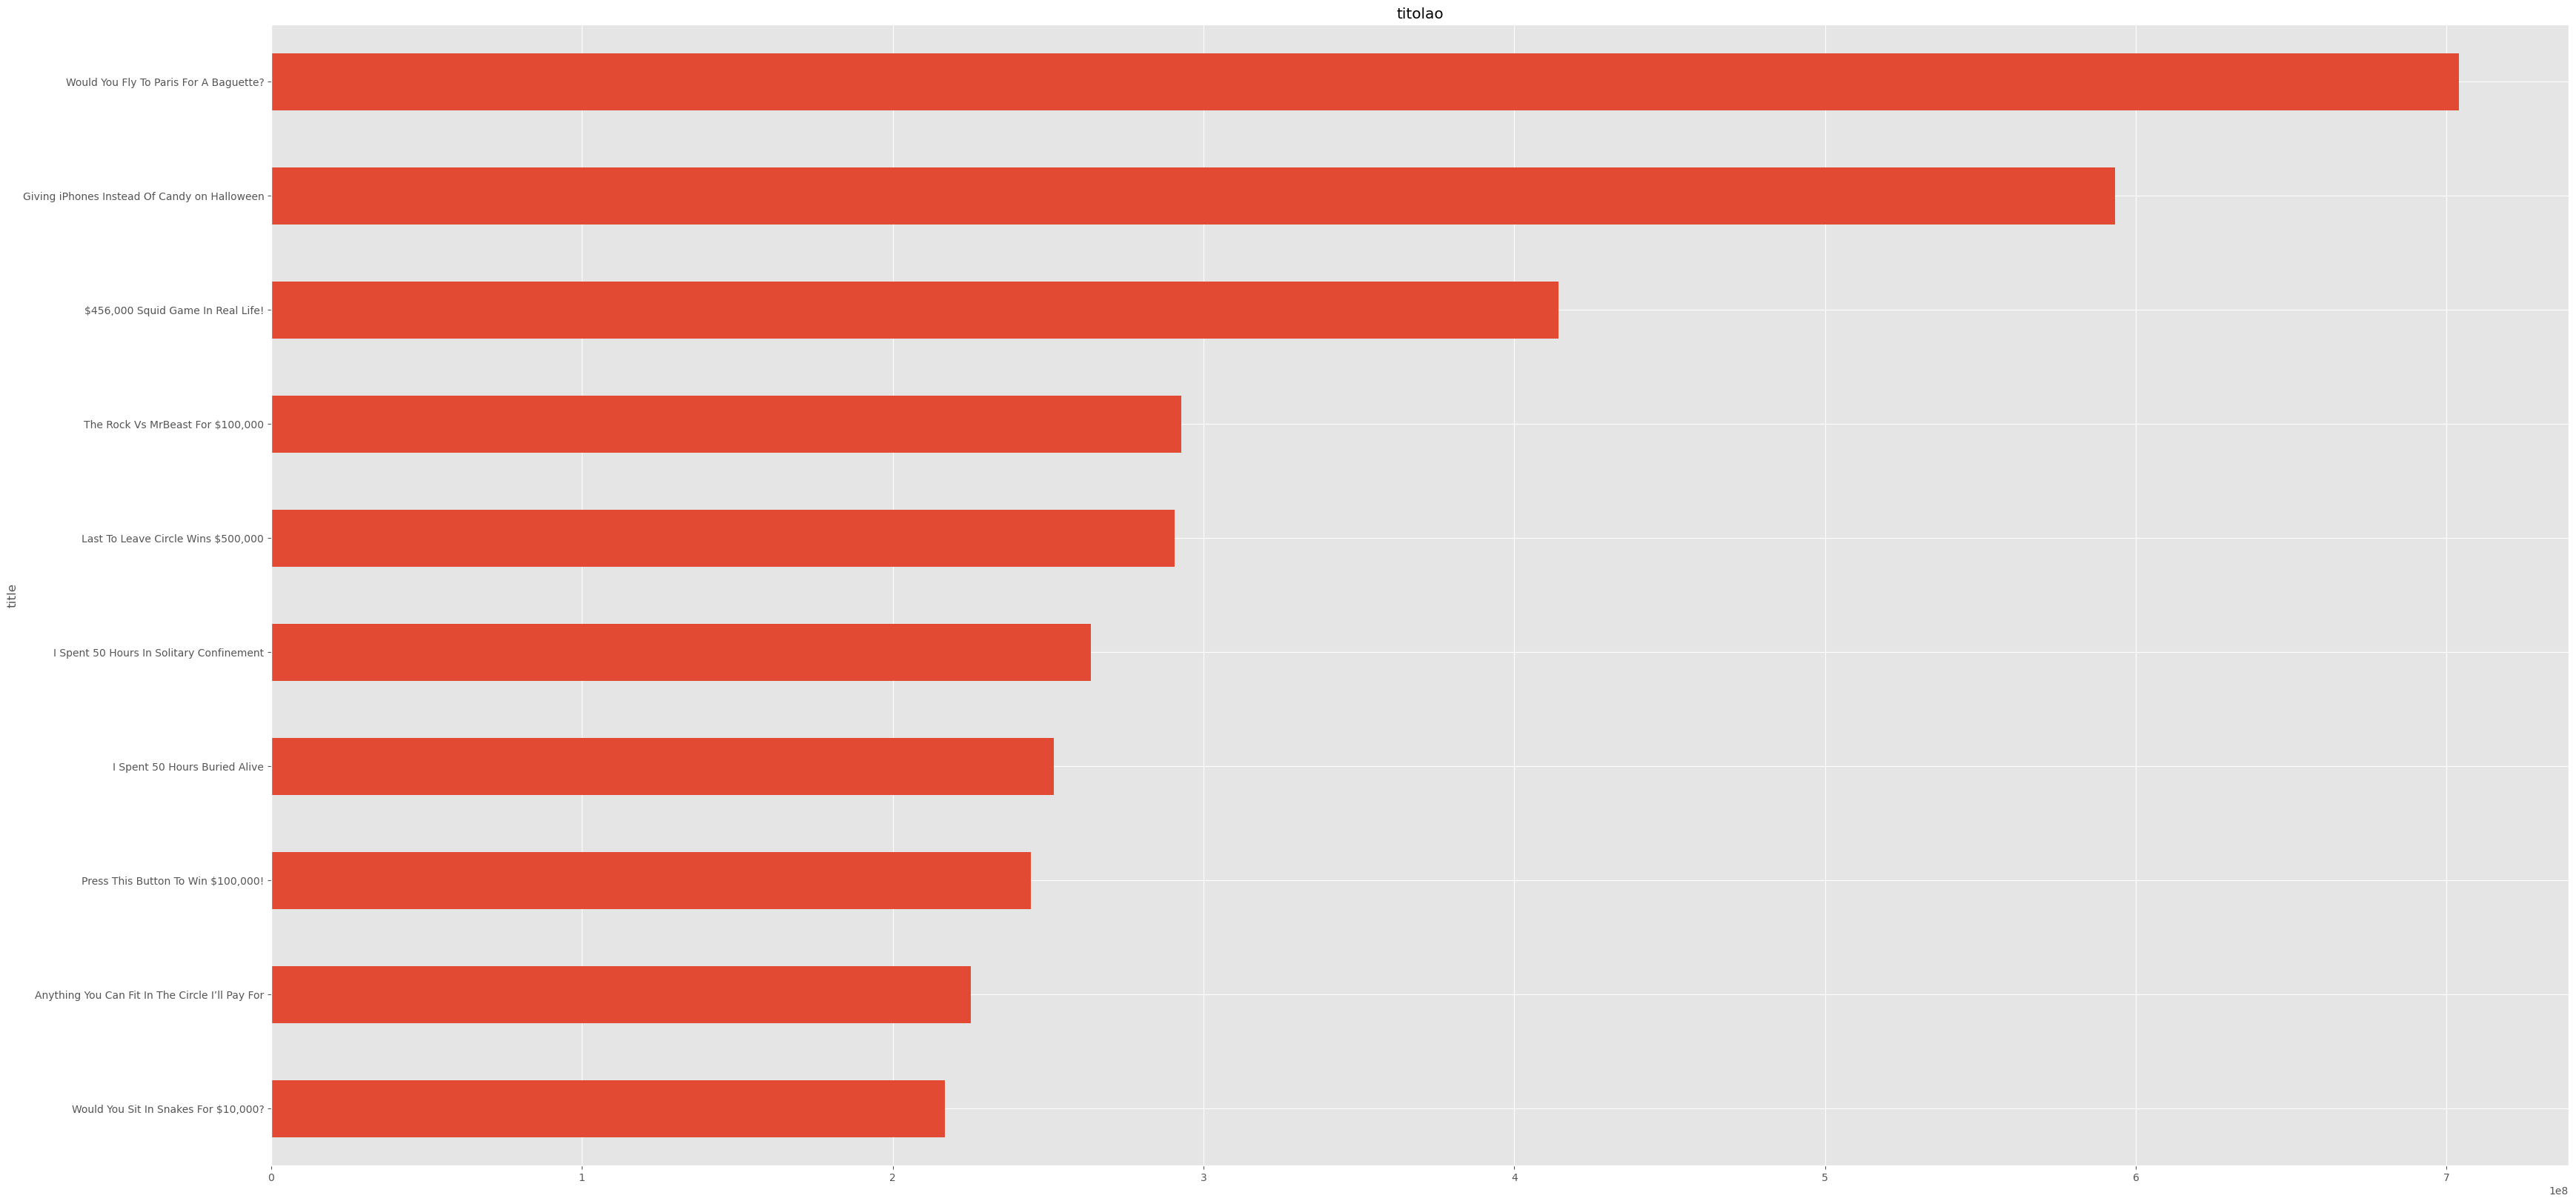

In [126]:
df_trends.groupby('title')['viewCount'].max() \
    .sort_values(ascending=False) \
    .head(10) \
    .sort_values() \
    .plot(kind = 'barh', figsize = (40,20),title = 'titolao')

plt.show()


<h3 style="color:lightcoral"> => Resampling </h3>

In [127]:
""" 
N.B.1
# Use resample to group rows by chunks of time: 
# In this case, the frequency is set to "W" => so data are resampled on a weekly basis. 
# The resample method takes the sum of all the values in each weekly group and returns a new DataFrame with the aggregated values.

N.B.2
- 'D' for daily frequency
- 'H' for hourly frequency
- 'T' or 'min' for minute frequency
- 'S' for second frequency
- 'M' for end-of-month frequency
- 'Q' for end-of-quarter frequency
- 'Y' for end-of-year frequency
"""
time_index = pd.date_range('06/06/2017', periods=100000, freq='30S') 
dataframe1 = pd.DataFrame(index=time_index) 
# Create column of random values 
dataframe1['Sale_Amount'] = np.random.randint(1, 10, 100000)

print(dataframe1.head())
dataframe1.resample('W').sum
print(dataframe1.head())


""" N.B.3
How to resample the pandas DataFrame `dataframe` by month and counts the number of observations in each monthly group?

The `label` parameter is set to `'left'`, which means that the labels for each group will be the left endpoint of the interval.
The `'M'` frequency is used to resample the data on a monthly basis.
This will group the data into monthly intervals based on the index of the DataFrame. For example, if the DataFrame has a daily frequency, 
each monthly group will contain all observations from the same month.
The `count()` function is then applied to each group, which returns the number of non-missing values in each column of the group. 
This will give you a count of the number of observations in each monthly group.
The `label='left'` parameter specifies that the labels for each group will be the left endpoint of the interval. 
This means that the label for each monthly group will be the first day of the month. 
If you omit the `label` parameter or set it to `'right'`, the labels will be the right endpoint of the interval, 
which would be the last day of the month.
"""
print(dataframe1.resample('M').count())
print()
print(dataframe1.resample('M', label='right').count())
print()
print(dataframe1.resample('M', label='left').count())
print()

                     Sale_Amount
2017-06-06 00:00:00            5
2017-06-06 00:00:30            7
2017-06-06 00:01:00            6
2017-06-06 00:01:30            9
2017-06-06 00:02:00            5
                     Sale_Amount
2017-06-06 00:00:00            5
2017-06-06 00:00:30            7
2017-06-06 00:01:00            6
2017-06-06 00:01:30            9
2017-06-06 00:02:00            5
            Sale_Amount
2017-06-30        72000
2017-07-31        28000

            Sale_Amount
2017-06-30        72000
2017-07-31        28000

            Sale_Amount
2017-05-31        72000
2017-06-30        28000



In [128]:
for name in df_tit['Name'][0:2]: 
    print(name.upper())
# or 
def uppercase(x): 
    return x.upper() 
df_tit['Name'].apply(uppercase)[0:2]


ALLEN, MISS ELISABETH WALTON
ALLISON, MISS HELEN LORAINE


0    ALLEN, MISS ELISABETH WALTON
1     ALLISON, MISS HELEN LORAINE
Name: Name, dtype: object

<h3 style="color:lightcoral"> => merge datasets (joint) </h3>

In [129]:
employee_data = {'employee_id': ['1', '2', '3', '4','6'], 'name': ['Amy Jones', 'Allen Keys', 'Alice Bees', 'Tim Horton', 'Jack Pidgey']} 
dataframe_employees = pd.DataFrame(employee_data, columns = ['employee_id', 'name']) 
sales_data = {'employee_id': ['1','3', '4', '5', '6'], 'total_sales': [23456, 2512, 2345, 2212, 1455]} 
dataframe_sales = pd.DataFrame(sales_data, columns = ['employee_id', 'total_sales']) 

print(dataframe_employees.head(10))
print(dataframe_sales.head(10))
mer = pd.merge(dataframe_employees, dataframe_sales, on='employee_id')
print()
print(mer.head(10))



  employee_id         name
0           1    Amy Jones
1           2   Allen Keys
2           3   Alice Bees
3           4   Tim Horton
4           6  Jack Pidgey
  employee_id  total_sales
0           1        23456
1           3         2512
2           4         2345
3           5         2212
4           6         1455

  employee_id         name  total_sales
0           1    Amy Jones        23456
1           3   Alice Bees         2512
2           4   Tim Horton         2345
3           6  Jack Pidgey         1455


In [130]:
mer_inner = pd.merge(dataframe_employees, dataframe_sales, on='employee_id')
mer_outer = pd.merge(dataframe_employees, dataframe_sales, on='employee_id', how='outer')
mer_left = pd.merge(dataframe_employees, dataframe_sales, on='employee_id', how='left')
mer_right = pd.merge(dataframe_employees, dataframe_sales, on='employee_id', how='right')
print(dataframe_employees.head(10))
print(dataframe_sales.head(10))
print()
print(mer_inner.head(10))
print(mer_outer.head(10))
print(mer_left.head(10))
print(mer_right.head(10))

  employee_id         name
0           1    Amy Jones
1           2   Allen Keys
2           3   Alice Bees
3           4   Tim Horton
4           6  Jack Pidgey
  employee_id  total_sales
0           1        23456
1           3         2512
2           4         2345
3           5         2212
4           6         1455

  employee_id         name  total_sales
0           1    Amy Jones        23456
1           3   Alice Bees         2512
2           4   Tim Horton         2345
3           6  Jack Pidgey         1455
  employee_id         name  total_sales
0           1    Amy Jones      23456.0
1           2   Allen Keys          NaN
2           3   Alice Bees       2512.0
3           4   Tim Horton       2345.0
4           6  Jack Pidgey       1455.0
5           5          NaN       2212.0
  employee_id         name  total_sales
0           1    Amy Jones      23456.0
1           2   Allen Keys          NaN
2           3   Alice Bees       2512.0
3           4   Tim Horton       23

## Rescale features:
<!-- $\hat{x_{i}} = \hat{\beta}_{0} + \sum \limits _{j=1} ^{p} X_{j}\hat{\beta}_{j} $ -->

$$x_i' = \frac{x_i - \min(x)}{\max(x) - \min(x)}$$
$$x_i' = \frac{x_i - \bar{x}}{\sigma}$$
$$\left\lVert x \right\rVert_2 = \sqrt{\sum_{i=1}^n x_i^2}$$
$$\left\lVert x \right\rVert_1 = \sum_{i=1}^n \left| x_i \right|$$

In [131]:
# Rescale the values of a numerical feature to be between two values
# MinMaxScaler to rescale a feature array
"""
Rescaling is a common preprocessing task in machine learning. 
same scale = e.g. 0 to 1 or –1 to 1. 
There are a number of rescaling techniques, but one of the simplest is called min-max scaling. 
Min-max scaling uses the minimum and maxi‐ mum values of a feature to rescale values to within a range. 
x_i^'  = (x_i - min(x))/(max(x) - min(x))
"""
feature = np.array([[-500.5], [-100.1], [0], [100.1], [900.9]]) 

# Create scaler 
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
# Scale feature
scaled_feature = minmax_scale.fit_transform(feature) 
scaled_feature

array([[0.        ],
       [0.28571429],
       [0.35714286],
       [0.42857143],
       [1.        ]])

In [132]:
""" A common alternative to min-max is rescaling of features to be approximately standard normally distributed. 
with the standardization to transform the data such that it has a mean of 0 and a standard deviation of 1. 
"""
x = np.array([[-1000.1], [-200.2], [500.5], [600.6], [9000.9]]) 
scaler = preprocessing.StandardScaler() 
# Transform the feature 
standardized = scaler.fit_transform(x)
print(x)
standardized

[[-1000.1]
 [ -200.2]
 [  500.5]
 [  600.6]
 [ 9000.9]]


array([[-0.76058269],
       [-0.54177196],
       [-0.35009716],
       [-0.32271504],
       [ 1.97516685]])

In [133]:
""" If dataset has significant outliers => it can negatively impact our standardization by affecting the feature’s mean and variance. 
In this scenario, it is often helpful to instead rescale the feature using the median and quartile range. 
"""
robust_scaler = preprocessing.RobustScaler() 
robust_scaler.fit_transform(x)

array([[-1.87387612],
       [-0.875     ],
       [ 0.        ],
       [ 0.125     ],
       [10.61488511]])

<h3 style="color:lightcoral"> => Normalize </h3>

In [134]:
""" To rescale the feature values of observations to have unit norm (a total length of 1)
Normalizer with a norm argument
Normalizer provides three norm options with Euclidean norm (often called L2) being the default argument
"""
features = np.array([[0.5, 0.5],[1.1, 3.4],[1.5, 20.2],[1.64, 34.2],[10.9, 3.52]])
normaliz = preprocessing.Normalizer(norm='l2')
normaliz.transform(features)
# or 
# features_l2_norm = preprocessing.Normalizer(norm="l2").transform(features)
# features_l2_norm

array([[0.70710678, 0.70710678],
       [0.30782029, 0.95144452],
       [0.07405353, 0.99725427],
       [0.04789818, 0.99885222],
       [0.95160983, 0.30730886]])

In [135]:
features_l1_norm = preprocessing.Normalizer(norm="l1").transform(features)
features_l1_norm

array([[0.5       , 0.5       ],
       [0.24444444, 0.75555556],
       [0.06912442, 0.93087558],
       [0.04575893, 0.95424107],
       [0.75589459, 0.24410541]])

In [136]:
""" Polynomial features. 
They are often created when we want to include the notion that there exists a nonlinear relationship between the features and the target. 
For example, we might suspect that the effect of age on the probability of having a major medical condition is not constant over time but increases as age increases. 
We can encode that nonconstant effect in a feature, by generating that feature’s higher-order forms (x^2, x^3, etc.)."""

features = np.array([[2, 3], [2, 3],[3, 3]])
poly_interaction = preprocessing.PolynomialFeatures(degree=2, include_bias=False)   #max degree of poly = 2
poly = poly_interaction.fit_transform(features)
poly

array([[2., 3., 4., 6., 9.],
       [2., 3., 4., 6., 9.],
       [3., 3., 9., 9., 9.]])

In [137]:
interaction = preprocessing.PolynomialFeatures(degree=2, interaction_only=True, include_bias=False) 
interaction.fit_transform(features)

array([[2., 3., 6.],
       [2., 3., 6.],
       [3., 3., 9.]])

In [138]:
features = np.array([[2, 3], [2, 3], [2, 3]]) 

def add_ten(x): 
    return x + 10 

ten_transformer = preprocessing.FunctionTransformer(add_ten) 
ten = ten_transformer.transform(features) 
print(ten)

# Apply transformation
df = pd.DataFrame(features, columns=["feature_1", "feature_2"])
df.apply(add_ten)

[[12 13]
 [12 13]
 [12 13]]


,feature_1,feature_2
0,12,13
1,12,13
2,12,13


<h3 style="color:lightcoral"> Deal with outliers </h3>
<div style="margin-top: -24px;">
Common method: Assume data are normally distributed and based on that assumption “draw” an ellipse around the data. <br>
Classifying any observation inside the ellipse as an inlier (labeled as 1) and any observation outside the ellipse as an outlier (labeled as -1). <br>
CONS =>  The limit of this approach is the need to specify a contamination parameter, <br>
which is the proportion of observations that are outliers a value that we don’t know. 
</div>

Contamination is a sort of estimate of the cleanliness of our data. <br>
Set contamination:
<div style="margin-top: -14px;">

+ Small => few outliers 
+ High => many outliers
</div>

In [139]:
# Create simulated data 
features, _ = make_blobs(n_samples = 10, n_features = 2, centers = 1, random_state = 1) 

print(features)
# Replace the first observation's values with extreme values 
features[0,0] = 10000 
features[0,1] = 10000
# Define detector 
outlier_detector = EllipticEnvelope(contamination=.1) 
# Fit detector 
outlier_detector.fit(features) 
# Predict outliers 
outlier_detector.predict(features)

[[-1.83198811  3.52863145]
 [-2.76017908  5.55121358]
 [-1.61734616  4.98930508]
 [-0.52579046  3.3065986 ]
 [ 0.08525186  3.64528297]
 [-0.79415228  2.10495117]
 [-1.34052081  4.15711949]
 [-1.98197711  4.02243551]
 [-2.18773166  3.33352125]
 [-0.19745197  2.34634916]]


array([-1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [140]:
""" Instead of looking at observations as a whole, we can instead look at individual features and identify extreme values 
in those features using interquartile range (IQR) 
IQR is the difference between the first and third quartile of a set of data. 
You can think of IQR as the spread of the bulk of the data, with outliers being observations far from the main concentration of data. 
Outliers are commonly defined as any value 1.5 IQRs less than the first quartile or 1.5 IQRs greater than the third quartile.
"""
# take one feature 
feature = features[:,0] 
print(feature)
print()
def indicies_of_outliers(x): 
	""" Get outliers' indexes """
	q1, q3 = np.percentile(x, [25, 75])
	iqr = q3 - q1 
	lower_bound = q1 - (iqr * 1.5) 
	upper_bound = q3 + (iqr * 1.5)
	return np.where((x > upper_bound) | (x < lower_bound)) 

indicies_of_outliers(feature)

[ 1.00000000e+04 -2.76017908e+00 -1.61734616e+00 -5.25790464e-01
  8.52518583e-02 -7.94152277e-01 -1.34052081e+00 -1.98197711e+00
 -2.18773166e+00 -1.97451969e-01]



(array([0]),)

<h3 style="color:lightcoral"> Drop outliers</h3>

In [147]:
houses = pd.DataFrame()
houses['Price'] = [534433, 392333, 293222, 4322032] 
houses['Bathrooms'] = [2, 3.5, 2, 116] 
houses['Square_Feet'] = [1500, 2500, 1500, 48000] 
print(houses)
# Create feature based on boolean condition 
houses["Outlier"] = np.where(houses["Bathrooms"] < 20, 0, 1)
aa = houses[houses['Bathrooms'] < 20]
print(houses)
print(aa)
# Log feature 
houses["Log_Of_Square_Feet"] = [np.log(x) for x in houses["Square_Feet"]]
houses

     Price  Bathrooms  Square_Feet
0   534433        2.0         1500
1   392333        3.5         2500
2   293222        2.0         1500
3  4322032      116.0        48000
     Price  Bathrooms  Square_Feet  Outlier
0   534433        2.0         1500        0
1   392333        3.5         2500        0
2   293222        2.0         1500        0
3  4322032      116.0        48000        1
    Price  Bathrooms  Square_Feet  Outlier
0  534433        2.0         1500        0
1  392333        3.5         2500        0
2  293222        2.0         1500        0


,Price,Bathrooms,Square_Feet,Outlier,Log_Of_Square_Feet
0,534433,2.0,1500,0,7.313220
1,392333,3.5,2500,0,7.824046
2,293222,2.0,1500,0,7.313220
3,4322032,116.0,48000,1,10.778956


<h2 style="color:lightcoral"> Encode </h2>

In [153]:
""" Break up a numerical feature into discrete bins. 
Depending on how we want to break up the data, there are two techniques we can use. 
First, we can binarize the feature according to some threshold
Second, we can break up numerical features according to multiple thresholds
"""
# 1
age = np.array([[6], [12], [20], [36], [65]]) 
binarizer = preprocessing.Binarizer(threshold=18) 
binarizer.fit_transform(age)

array([[0],
       [0],
       [1],
       [1],
       [1]])

In [154]:
# 2 
ecco = np.digitize(age, bins=[20,30,64])
ecco

array([[0],
       [0],
       [1],
       [2],
       [3]])

In [155]:
# 3
np.digitize(age, bins=[18])

array([[0],
       [0],
       [1],
       [1],
       [1]])

In [ ]:
""" Delete observations containing missing values with NumPy """
features = np.array([[1.1, 11.1], [2.2, 22.2], [3.3, 33.3], [4.4, 44.4], [np.nan, 55]]) 
# Keep only observations that are not (denoted by ~) missing 
features[~np.isnan(features).any(axis=1)]

"""use pandas instead! """
dataframe = pd.DataFrame(features, columns=["feature_1", "feature_2"]) 
# Remove observations with missing values 
dataframe.dropna()